# Import libraries and ready data

In [31]:
import cv2
import matplotlib.pyplot as plt

In [32]:
config_file = 'data/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'data/frozen_inference_graph.pb'

In [33]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Find index

In [34]:
classLabels = [] #empty list of python
file = 'data/Labels.txt'

with open(file, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    print(classLabels.index('laptop'))

63


In [35]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'sheep', 'cat', 'dog', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'horse', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'tree', 'bush', 'lake', 'mountain', 'water']


In [36]:
print(len(classLabels))

85


In [37]:
if 'lake' in classLabels:
    print('yes')
else:
    print("Does not exist")

yes


In [38]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5) # 255 / 2
model.setInputMean((127.5, 127.5, 127.5)) ##mobilenet input is [-1, 1]
model.setInputSwapRB(True) #set input as RB

< cv2.dnn.Model 0000020B11170390>

# Read an image

In [9]:
img = cv2.imread('data/man-car.jpg')

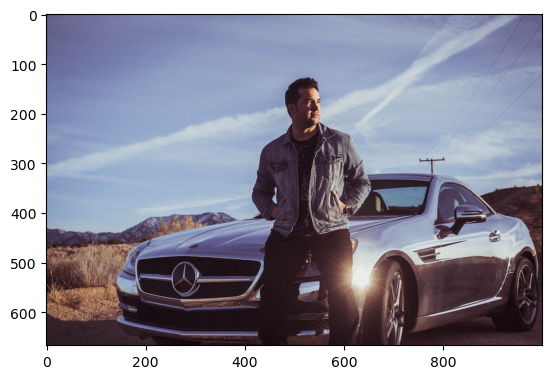

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [12]:
print(ClassIndex) # person & car labels

[1 3]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2) # color blue of rectangle
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

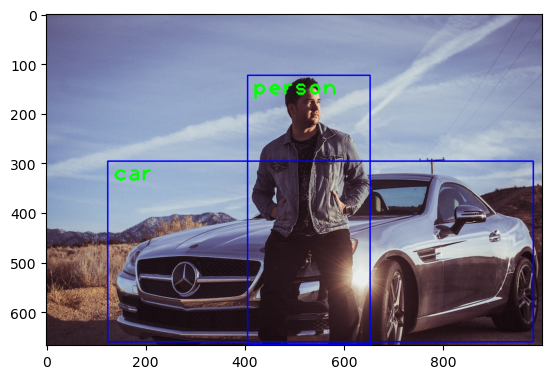

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Example 2

In [15]:
img_test = cv2.imread('data/cat.jpg')

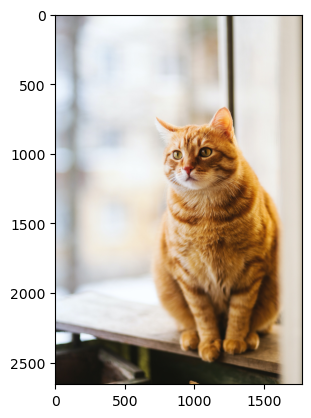

In [16]:
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

In [17]:
ClassIndex, confidence, bbox = model.detect(img_test, confThreshold = 0.5)

In [18]:
print(ClassIndex) 

[17]


In [19]:
font_scale = 5
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img_test, boxes, (255, 0, 0), 2) # color blue of rectangle
    cv2.putText(img_test, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)

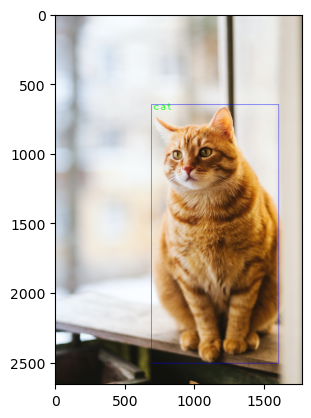

In [20]:
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))

# Video example

In [21]:
video = cv2.VideoCapture("data/walking.mp4")

# check if the video is opened correctly
if not video.isOpened():
    video = cv2.VideoCapture(0)
if not video.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = video.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2) # color blue of rectangle
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color = (0, 255, 0), thickness = 3)
                
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

()
()
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
()
()
()
()
()
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
[10]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[10]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[3]
[3]
()
()
()
()
()
[3]
[3]
[3]
()
()
[1]
[1 3]
[1 3 1 1]
[1 3 1 1]
[1 3 1]
[1 3]
[1 3 1]
[3 1]
[3 1 1]
[1 3 1]
[1 3 3]
[1 3]
[3]
[3 1 1]
[1 3]
[3 1 1]
[3 1 1 1 1 1]
[3 1 1 1]
[1 1 3 1]
[3 1 1]
[3 1 1 1]
[3 1]
[3 1 1]
[3 3]
[3 3 1]
[3 3 1 1]
[3 1 1 3 1]
[3 1 1 3]
[3 3 1 1]
[3 3 1 1]
[3 3 1 1 1]
[3 3]
[3 3 1 1]
[3 3 1 1]
[3 1 3 3]
[3 1]
[3 1 3 1]
[3 1 3]
[3 3 4 3]
[3 3 3 1 3]
[3 3 3 1 3 3]
[3 3 3 1 3]
[3 3 3 3 3 1]
[3 3 3 3 3]
[3 3 3 3 1]
[3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 3]
[3 3 3 3]
[3 3 3 3 3]
[3 3 3 3]
[3 3 3 3]
[3 3 3]
[3 3 1 3 1]
[3 3 3 1 3 3]
[3 3 3 1]
[3 3 3 3 1 3 1]
[3 3 3 1]
[3 3 3 1 1 3 1]
[3 3 1 1 3 3 1]
[1

# Test with MobileNet

In [1]:
import tensorflow as tf
import numpy as np
import cv2

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\aoral\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

In [3]:
def classify_image(img_path):
    # Load the image file, resizing it to 224x224 pixels (required by this model)
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make a prediction
    predictions = model.predict(img_array)

    # Decode the prediction into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    return decode_predictions(predictions, top=1)[0][0]

In [4]:
# Example usage
img_path = 'data/dog.jpg'  # Replace with your image path
prediction = classify_image(img_path)
print(f"This image is a {prediction[1]} with a confidence of {prediction[2]:.2f}")

1/1 [==============================] - 3s 3s/step
This image is a Labrador_retriever with a confidence of 0.49


# Test With Video

In [27]:
# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

In [5]:
def classify_frame(frame):
    # Convert the frame to RGB (OpenCV uses BGR)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Resize the frame to 224x224 pixels (required by this model)
    resized_frame = cv2.resize(frame_rgb, (224, 224))

    # Convert the frame to a numpy array and preprocess it
    frame_array = image.img_to_array(resized_frame)
    frame_array = np.expand_dims(frame_array, axis=0)
    frame_array = preprocess_input(frame_array)

    # Make a prediction
    predictions = model.predict(frame_array)

    # Decode the prediction
    return decode_predictions(predictions, top=1)[0][0]

In [7]:
# Load your video
video_path = 'data/cat_and_dog.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Classify the current frame
    prediction = classify_frame(frame)
    print(f"Frame classified as {prediction[1]} with confidence {prediction[2]:.2f}")

    # Optional: Display the frame (with or without classification)
    cv2.imshow('Frame', frame)

    # Break the loop with a specific key (e.g., 'q')
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step
Frame classified as Pembroke with confidence 0.09
1/1 [==============================] - 0s 19ms/step
Frame classified as Chihuahua with confidence 0.13
1/1 [==============================] - 0s 19ms/step
Frame classified as Chihuahua with confidence 0.19
1/1 [==============================] - 0s 20ms/step
Frame classified as Chihuahua with confidence 0.21
1/1 [==============================] - 0s 16ms/step
Frame classified as Chihuahua with confidence 0.22
1/1 [==============================] - 0s 17ms/step
Frame classified as Chihuahua with confidence 0.28
1/1 [==============================] - 0s 17ms/step
Frame classified as Chihuahua with confidence 0.32
1/1 [==============================] - 0s 18ms/step
Frame classified as Chihuahua with confidence 0.16
1/1 [==============================] - 0s 17ms/step
Frame classified as Chihuahua with confidence 0.20
1/1 [==============================] - 0s 17ms/step
Frame classified as Ch

1/1 [==============================] - 0s 17ms/step
Frame classified as Great_Dane with confidence 0.09
1/1 [==============================] - 0s 16ms/step
Frame classified as whippet with confidence 0.22
1/1 [==============================] - 0s 15ms/step
Frame classified as Chihuahua with confidence 0.22
1/1 [==============================] - 0s 15ms/step
Frame classified as Italian_greyhound with confidence 0.20
1/1 [==============================] - 0s 15ms/step
Frame classified as beagle with confidence 0.20
1/1 [==============================] - 0s 15ms/step
Frame classified as beagle with confidence 0.18
1/1 [==============================] - 0s 15ms/step
Frame classified as Cardigan with confidence 0.23
1/1 [==============================] - 0s 16ms/step
Frame classified as beagle with confidence 0.10
1/1 [==============================] - 0s 15ms/step
Frame classified as Cardigan with confidence 0.12
1/1 [==============================] - 0s 15ms/step
Frame classified as Cardi

1/1 [==============================] - 0s 15ms/step
Frame classified as German_shepherd with confidence 0.15
1/1 [==============================] - 0s 15ms/step
Frame classified as Cardigan with confidence 0.12
1/1 [==============================] - 0s 15ms/step
Frame classified as Cardigan with confidence 0.33
1/1 [==============================] - 0s 16ms/step
Frame classified as German_shepherd with confidence 0.21
1/1 [==============================] - 0s 17ms/step
Frame classified as Siberian_husky with confidence 0.68
1/1 [==============================] - 0s 18ms/step
Frame classified as Siberian_husky with confidence 0.26
1/1 [==============================] - 0s 18ms/step
Frame classified as Siberian_husky with confidence 0.19
1/1 [==============================] - 0s 19ms/step
Frame classified as Eskimo_dog with confidence 0.25
1/1 [==============================] - 0s 15ms/step
Frame classified as Siberian_husky with confidence 0.64
1/1 [==============================] - 0s 